In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from matplotlib import colors as mcolors
import torch
import random
import pickle

# import sklearn.metrics

# from argparse import Namespace



In [3]:
weights = [300, 500, 540]
values = weights

weighted_average = sum(weight * value for weight, value in zip(weights, values)) / sum(weights)
weighted_average, []+[0]

(471.34328358208955, [0])

# ACC/Prec/Recall through Iterations of IterDFM 

In [9]:
versions = ['281121_171344']
names  = ['IterDFM Th_85_50 (Ours)']
lines = ['-']
colors = ['#ff0040']
results_dir = '../src/novelty_dfm_CL/Results_DFM_CL/cifar10/'


iterations_n = 5
tasks_max = 8

acc_avg= np.zeros((len(versions), tasks_max, iterations_n))


precisions= np.zeros((len(versions), tasks_max, iterations_n))
recalls= np.zeros((len(versions), tasks_max, iterations_n))


time_dict = {0:0, 2:1, 3:2, 4:3, 5:4}

for n in range(len(versions)):

    data_file= '%s/%s/novelty_accuracies_iter.txt'%(results_dir, versions[n])
    
    time = []
    f = open(data_file, 'r') 

    print(data_file)
    for i, line in enumerate(f):
        
        if i==0:
            continue
        line = line.strip().split(' ')
        acc_a  = float(line[2])
        precision = float(line[4])
        recall = float(line[5])
        current_task= int(line[0])-1
        time = time_dict[int(line[1])]


        acc_avg[n, current_task, time] = acc_a
        precisions[n, current_task, time] = precision
        recalls[n, current_task, time] = recall


f1 = 2*(precisions*recalls)/(precisions+recalls)



data_choice_All = acc_avg




if len(data_choice_All.shape)==2:
    data_choice_All = np.expand_dims(data_choice_All, axis=0)



# -------- compute the average and std along dimension 


data_choice = np.mean(data_choice_All, axis=1)


def standard_error(data):
    error = np.std(data, ddof=1) / np.sqrt(np.size(data))
    return error

data_choice_std = np.std(data_choice_All, axis=1)/np.sqrt(data_choice_All.shape[1])




../src/novelty_dfm_CL/Results_DFM_CL/cifar10//281121_171344/novelty_accuracies_iter.txt


In [10]:
acc_simple = [0.8147, 0.8283, 0.6768, 0.8662, 0.7660, 0.8555, 0.8742, 0.8237]

average_acc_dfm_simple = np.mean(acc_simple)


precisions_simple = np.array([0.9813, 0.9437, 0.7223, 0.8662, 0.7660, 0.8555, 0.8742, 0.8237])
recalls_simple = np.array([0.7360, 0.7668, 0.6620, 0.8662, 0.7660, 0.8555, 0.8742, 0.8237])

f1_simple = 2*(precisions_simple*recalls_simple)/(precisions_simple+recalls_simple)

f1_simple_avg = np.mean(f1_simple)




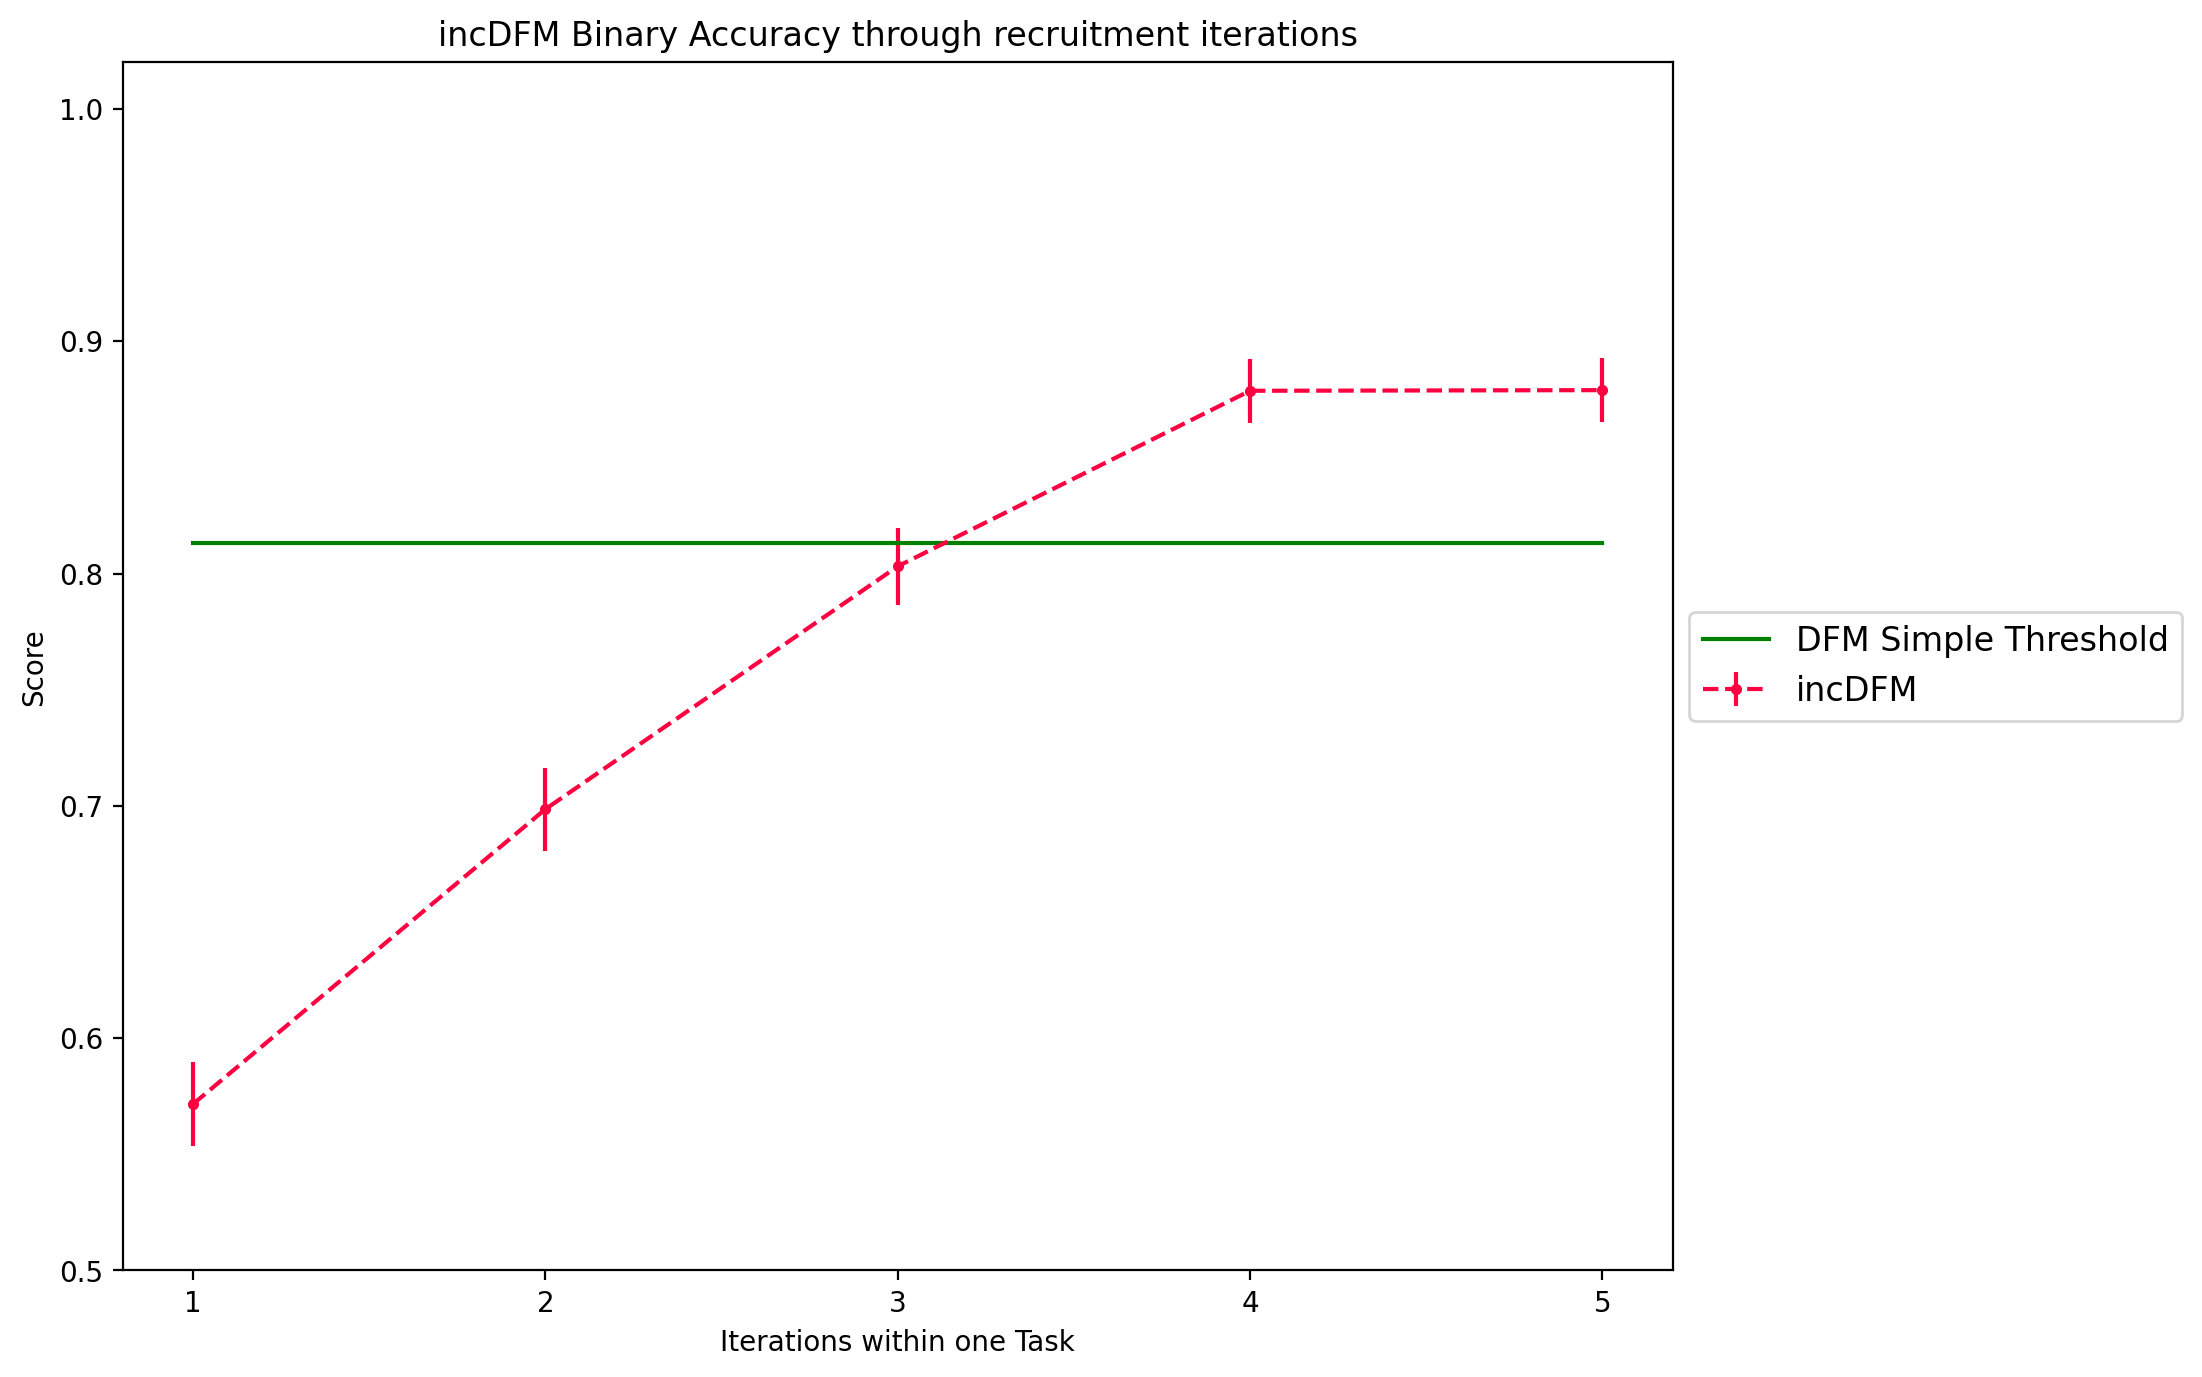

In [21]:
plt.figure(figsize=(10,8))
plt.title('incDFM Binary Accuracy through recruitment iterations')


for n in range(len(versions)):

    plt.errorbar(np.arange(1,data_choice[n,...].shape[0]+1), data_choice[n,...], data_choice_std[n,...], marker='.', \
        linestyle='dashed', label='incDFM', color=colors[n])


    # plt.plot(np.arange(1,data_choice[n,...].shape[0]+1), np.ones(data_choice[n,...].shape[0])*average_acc_dfm_simple, color='g')
    plt.plot(np.arange(1,data_choice[n,...].shape[0]+1), np.ones(data_choice[n,...].shape[0])*average_acc_dfm_simple, color='g', label='DFM Simple Threshold')


plt.ylim([0.5,1.02])
plt.xticks(np.arange(1,6))
plt.xlabel('Iterations within one Task')
plt.ylabel('Score')
plt.legend(fontsize='large', loc='center left', bbox_to_anchor=(1, 0.5))


In [13]:


# fig_size_ = (10,15)

# tasks_plot = np.arange(0,tasks_max,1)

# f, axarr = plt.subplots(tasks_plot.shape[0], sharex=True, figsize=fig_size_)

# f.subplots_adjust(hspace=0.4)
# # f.suptitle('ACGAN Classifier Accuracies per task \n Dataset %s'%(dataset_name))


# axes=np.arange(len(versions))

# alpha=0.3
# for i,t in enumerate(tasks_plot):

#     for k in range(data_choice.shape[0]): # versions 
#         axarr[i].plot(np.arange(data_choice.shape[2]), data_choice[k,t,:], linestyle=lines[k], marker='o', color=colors[k], \
#             linewidth=1.5, markersize=2, label='%s'% (names[k]))
    
#     # for b in range(tasks_max):
#     #     axarr[i].axvline(x=1*(b+1), alpha=alpha)
        
#     # axarr[i].set_ylabel('%d'%((t)), rotation=0, fontsize=7, fontweight='semibold')

#     axarr[i].set_yticks(np.arange(0.4,1.05,0.2))
#     axarr[i].set_ylim([0.4, 1.0])
#     # # axarr[i].set_yticklabels(['0.25', '0.5', '0.75', '1'], fontsize=3, fontweight='semibold')
    
#     # axarr[i].tick_params(axis = 'both', which = 'major', labelsize = 7, width=1)

#     # for axis in ['bottom','left']:
#     #     axarr[i].spines[axis].set_linewidth(1.0)

    
#     # # # Hide the right and top spines
#     # axarr[i].spines['right'].set_visible(False)
#     # axarr[i].spines['top'].set_visible(False)
#     # if i<tasks_max-1:
#     axarr[i].spines['right'].set_visible(False)
#     axarr[i].spines['top'].set_visible(False)
#     axarr[i].set_xticks(np.arange(iterations_n))
#     #     axarr[i].tick_params(bottom="off")


#     # # # # Only show ticks on the left and bottom spines
#     # axarr[i].yaxis.set_ticks_position('left')

    
# # if dataset_name=='mnist' or dataset_name=='permuted':
# # axarr[-1].set_xticks(np.arange(0,data_choice.shape[2]+epoch_max,epoch_max))
#     # axarr[-1].set_xticklabels(['0', '5', '10', '15', '20', '25'],fontweight='semibold')
#     ## axarr[-1].set_xticklabels(np.arange(0,data_mult.shape[1]+epoch_max,50), fontsize=7, fontweight='semibold')
#     ## axarr[-1].set_xlabel('Iterations',  fontsize='small', fontweight='semibold') 


# # axarr[-1].axis([0, np.arange(data_choice.shape[1]).shape[0], 0.0, 1.0])

# lgd = axarr[-1].legend(bbox_to_anchor=(1, 0.5), loc='center left', borderaxespad=0., fontsize='large')
# lgd.get_frame().set_linewidth(0.0)

# Acc/Prec/recall through tasks

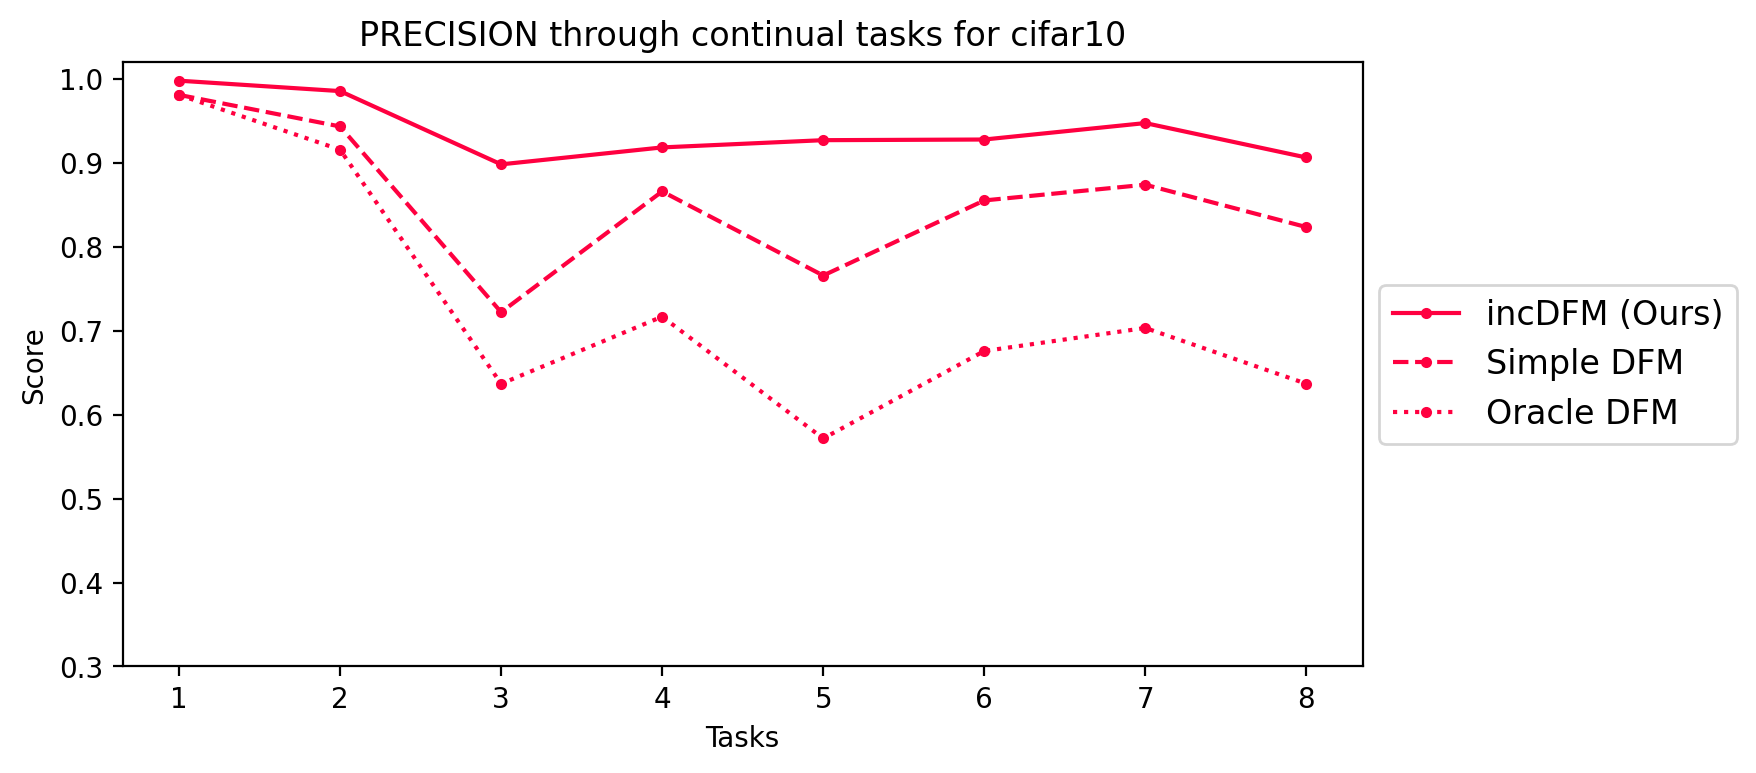

In [3]:
name_plot='Precision'
dataset = 'cifar10'
exp_type='1class'
num_tasks=8
results_dir = '../src/novelty_dfm_CL/Results_DFM_CL/cifar10/'
# results_dir = '../Results/%s/'%dataset

random.seed(1)


# versions = ['031121_210222', '101121_201502', '101121_220906', '101121_220655', \
#     '101121_220536', '101121_215648']
# names  = ['holdout_0.2_mix_1.0_preds','holdout_0.2_mix_1.0_preds_IterTH_85', \
#     'holdout_0.2_mix_1.0_preds_IterTH_85_Scaled_0.25', 'holdout_0.2_mix_1.0_preds_IterTH_85_OnlyNew', \
#         'holdout_0.2_mix_1.0_preds_IterTH_80', 'holdout_0.2_mix_1.0_preds_IterTH_90']\


# versions = ['281121_171344', '281121_171240',  '041121_203143', '271121_191932', '281121_170819']
# names  = ['IterDFM Th_85_50 (Ours)', 'SimpleDFM Th_50', 'SimpleDFM Th_50 GT', 'Generalized_ODIN Th_50', 'Mahalanobis Th_50']
# lines = ['dashed', 'dashed', '-', 'dashed', 'dashed']
# colors = ['#ff0040', '#8c66ff', '#ff66ff',  '#66b3ff', '#ffd966']



versions = ['281121_171344', '281121_171240',  '041121_203143']
names  = ['incDFM (Ours)', 'Simple DFM', 'Oracle DFM']
lines = ['-', 'dashed', 'dotted', '-', '-']
colors = ['#ff0040', '#ff0040', '#ff0040', '#00cc99', '#0080ff']


versions = ['281121_171344', '281121_171240',  '041121_203143', '271121_191932', '281121_170819']
names  = ['incDFM (Ours)', 'Simple DFM', 'Oracle DFM', 'Generalized Odin', 'Mahalanobis']
lines = ['-', 'dashed', 'dotted', '-', '-']
colors = ['#ff0040', '#ff0040', '#ff0040', '#00cc99', '#0080ff']



# versions = ['281121_171344', '281121_171240',  '041121_203143', '271121_191932', '271121_174734', '281121_170819', '291121_150040']
# names  = ['IterDFM Th_85_50 (Ours)', 'SimpleDFM Th_50', 'SimpleDFM Th_50 GT', 'Generalized_ODIN Th_50', \
#     'Generalized_ODIN Th_50 GT', 'Mahalanobis Th_50',  'Mahalanobis Th_50 GT']

# lines = ['-', 'dashed', 'dotted', '-', 'dotted', '-', 'dotted']
# colors = ['#ff0040', '#ff0040', '#ff0040',  '#00cc99', '#00cc99', '#0080ff', '#0080ff']


#

number_of_colors = len(names)

# colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#              for i in range(number_of_colors)]





plot_order={'Recall':0, 'Precision':1, 'Accuracy_overall':2, 'f_0.5':3, 'f_1': 4, 'f_2': 5}


def compute_stats_per_task(t, results, threshold=None):

    if hasattr(results, 'scores'):
        scores = results.scores[t]
    else:
        scores = results.scores_dist[t].min(0)

    if threshold is None:
        threshold = results.threshold[t]
        
    threshold = np.percentile(scores, threshold)

    gt_novelty = results.gt_novelty[t]

    if hasattr(results, 'preds'):
        inds_above = results.preds[t].astype(bool)
    else:
        inds_above = (scores>threshold) # binary classification (above th is considered to be Novelty (Positive class))
    

    # precision_novelty = gt_novelty[inds_above].sum()/gt_novelty[inds_above].shape[0]
    recall_novelty = gt_novelty[inds_above].sum()/gt_novelty.sum()

    inds_new = (gt_novelty==1)

    accuracy_overall = sum(inds_new == inds_above)/inds_new.shape[0]

    precision_novelty = np.sum(gt_novelty[inds_above]==np.ones(gt_novelty[inds_above].shape[0]))/gt_novelty[inds_above].shape[0]


    # Compute F-scores 
    labels = gt_novelty
    predictions = np.zeros(gt_novelty.shape)
    predictions[inds_above]=1
    f_1 = sklearn.metrics.fbeta_score(labels, predictions, beta=1.0)
    f_half = sklearn.metrics.fbeta_score(labels, predictions, beta=0.5)
    f_2 = sklearn.metrics.fbeta_score(labels, predictions, beta=2.0)



    return (recall_novelty, precision_novelty, accuracy_overall, f_half, f_1, f_2)



# Issue: in IterTh version, one does not select via a single threshold. Would have needed to save the indices selected, or the predictions 


scores = []
tasks = []
plt.rcParams['figure.dpi'] = 200 # default for me was 75

plt.figure(figsize=(8,4))
plt.title('%s through continual tasks for %s'%(name_plot.upper(), dataset))

for n in range(len(versions)):

    scores.append([])
    
    with open('%s/%s/results_tasks.pickle'%(results_dir, versions[n]), 'rb') as handle:
        per_task_results_comp = pickle.load(handle)
        
    if isinstance(per_task_results_comp, dict):
        per_task_results_comp = Namespace(**per_task_results_comp)
    
    for t in np.arange(1,num_tasks+1):
        vals = compute_stats_per_task(t, per_task_results_comp, threshold=50)

        scores[n].append(vals[plot_order[name_plot]])


    plt.plot(np.arange(1,len(scores[n])+1), scores[n], marker='.', linestyle=lines[n], label=names[n], color=colors[n])


# plt.tick_params(top='off',  right='off')

plt.ylim([0.3,1.02])
# plt.xlim([-0.01+1,0.01 +len(tasks)-1])
plt.xlabel('Tasks')
plt.ylabel('Score')
plt.legend(fontsize='large', loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig('%s/Scores_tasks_time.png'%dir_save)



# Avg Accuracy through epochs 

In [68]:
epoch_max = 20
tasks_max = 9
results_dir = '../src/novelty_dfm_CL/Results_DFM_CL/cifar10/'



versions = ['151121_212253', '181121_184834', '271121_191932', '281121_170819']
names  = ['Upper-bound GT', 'IterDFM Th_85_50 (Ours)', 'Generalized_ODIN Th_50', 'Mahalanobis Th_50']
lines = ['dotted', '-', '-', '-']
colors = ['#ff4000', '#ff0040', '#00cc99', '#0080ff']



# versions=['260721_193931']
# codes=['instance incremental']

acc_avg= np.zeros((len(versions), epoch_max*tasks_max,))

# Results/core50/260721_193716 = 5000 nc_v2
# Results/core50/260721_193831 = 10000 inc_1class
# Results/core50/260721_193851 = 5000 inc_1class


#Results/core50/260721_193931

# versions = ['210621_183745', '210621_183734', '280621_122726']

for n in range(len(versions)):

    data_file= '%s/%s/acc_avg.txt'%(results_dir, versions[n])
    
    acc_c =[]
    current_tasks = []
    time = []
    f = open(data_file, 'r') 

    print(data_file)
    for i, line in enumerate(f):
        
        line = line.strip().split(' ')
        acc_c.append(float(line[-1]))
        current_tasks.append(int(line[0])-1)
        time.append(int(line[1]))

        if (time[-1])+epoch_max*(current_tasks[-1])<epoch_max*tasks_max:
            acc_avg[n, (time[-1])+epoch_max*(current_tasks[-1])] = acc_c[-1]

../src/novelty_dfm_CL/Results_DFM_CL/cifar10//151121_212253/acc_avg.txt
../src/novelty_dfm_CL/Results_DFM_CL/cifar10//181121_184834/acc_avg.txt
../src/novelty_dfm_CL/Results_DFM_CL/cifar10//271121_191932/acc_avg.txt
../src/novelty_dfm_CL/Results_DFM_CL/cifar10//281121_170819/acc_avg.txt


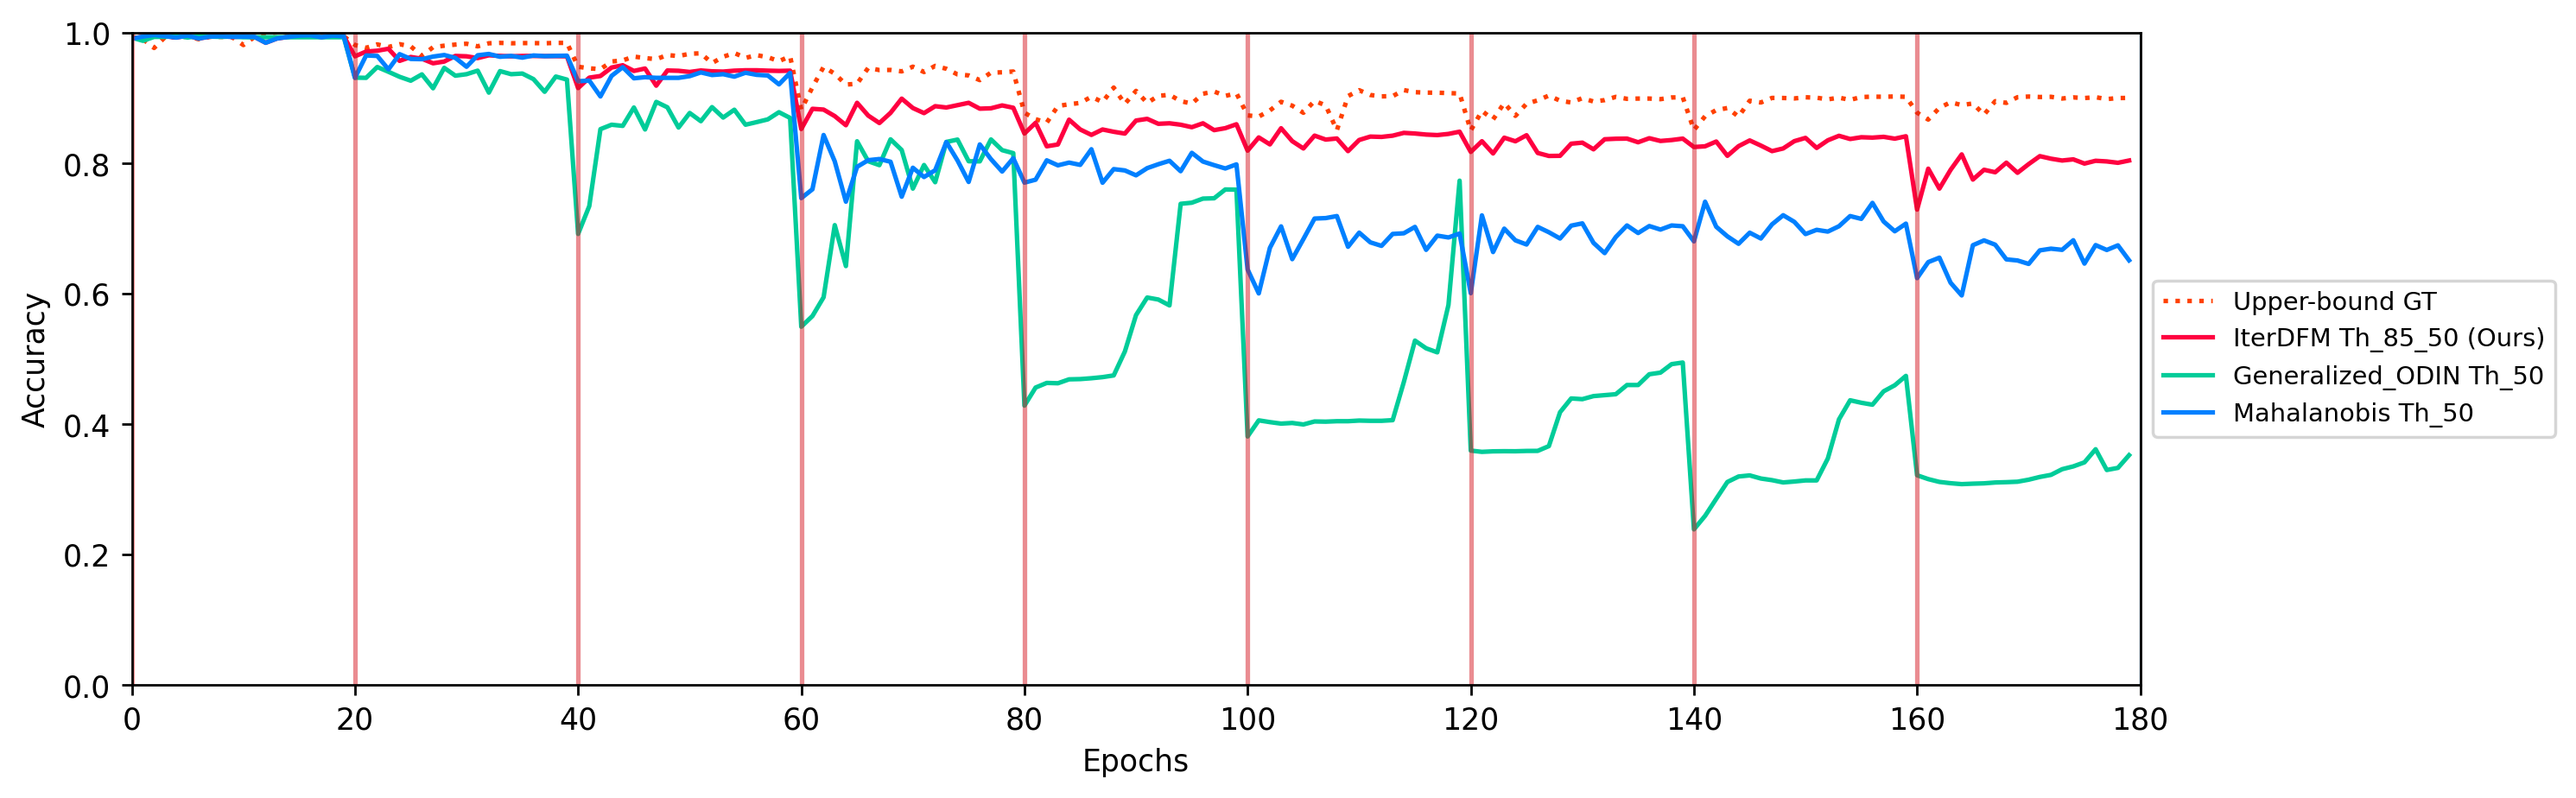

In [69]:





plt.rcParams['figure.dpi'] = 250 # default for me was 75

# colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
# colors_p = ['forestgreen', 'orange', 'blueviolet','r','olive', 'hotpink', 'r','y']


task_delim = epoch_max
task_delim_class = epoch_max*1

f, axarr = plt.subplots(1, sharex=True, figsize= (12,4))

f.subplots_adjust(hspace=0.4)
# f.suptitle('ACGAN Classifier Accuracies per task \n Dataset %s'%(dataset_name))

for k in range(acc_avg.shape[0]):
    axarr.plot(np.arange(acc_avg.shape[1]), acc_avg[k,:], linestyle=lines[k], color=colors[k], linewidth=1.5, \
        markersize=2, label='%s'% (names[k]))

alpha=0.15
for b in range(tasks_max):
    axarr.axvline(x=task_delim*(b+1), alpha=alpha)

for b in np.arange(0,tasks_max*epoch_max,task_delim_class):
    axarr.axvline(x=b, alpha=0.4, color='red')

box = (0.02, 2.5)

axarr.axis([0, np.arange(acc_avg.shape[1]).shape[0], 0.0, 1.0])
# lgd = axarr.legend( loc="lower right", fontsize='large')
# lgd.get_frame().set_linewidth(0.0)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))

# AUROC/AUPR through tasks 

../src/novelty_dfm_CL/Results_DFM_CL/cifar10//031121_210222/novelty_eval.txt
../src/novelty_dfm_CL/Results_DFM_CL/cifar10//101121_122006/novelty_eval.txt
../src/novelty_dfm_CL/Results_DFM_CL/cifar10//101121_123634/novelty_eval.txt
../src/novelty_dfm_CL/Results_DFM_CL/cifar10//101121_124850/novelty_eval.txt
../src/novelty_dfm_CL/Results_DFM_CL/cifar10//101121_125150/novelty_eval.txt


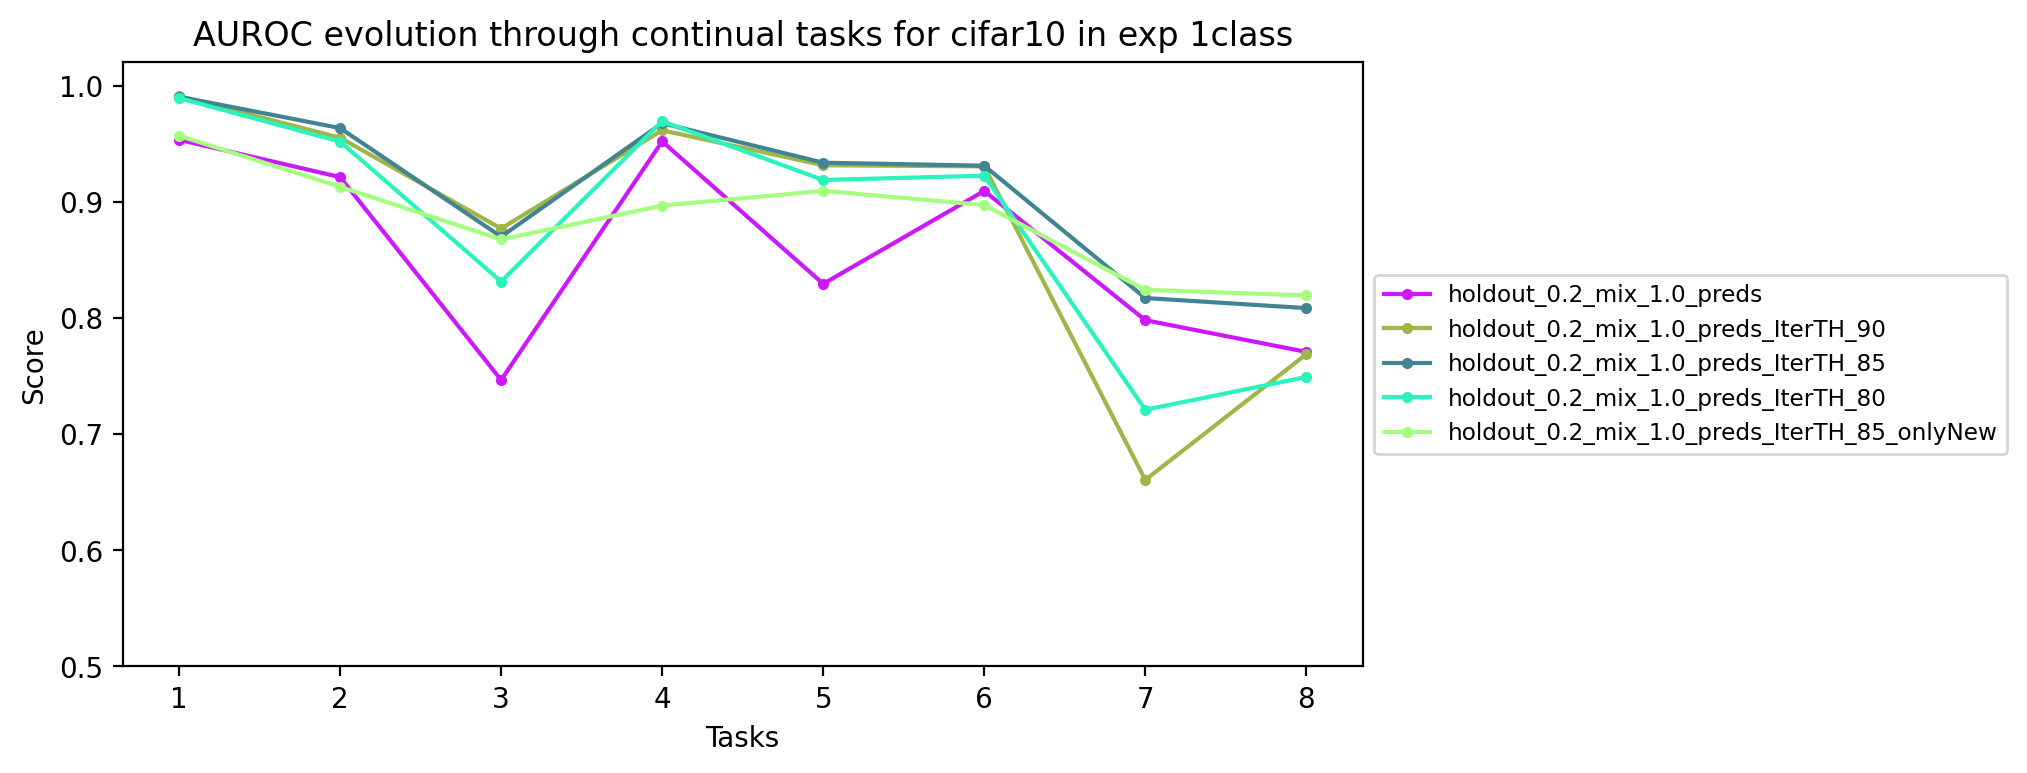

In [9]:
name_plot='accuracy'
dataset = 'cifar10'
exp_type='1class'

# results_dir = '../src/novelty_dfm_CL/Results_DFM_CL/cifar10/'
results_dir = '../src/novelty_dfm_CL/Results_DFM_CL/cifar10/'

random.seed(0)


versions = ['031121_210222','101121_122006', '101121_123634',  '101121_124850', '101121_125150']
names  = ['holdout_0.2_mix_1.0_preds', 'holdout_0.2_mix_1.0_preds_IterTH_90', 'holdout_0.2_mix_1.0_preds_IterTH_85',  \
    'holdout_0.2_mix_1.0_preds_IterTH_80', 'holdout_0.2_mix_1.0_preds_IterTH_85_onlyNew']\


number_of_colors = len(names)

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

# colors = ['r', 'g', 'y', 'c','m', 'b']

if name_plot=='aupr':
    pos = 2
elif name_plot=='auroc':
    pos=1

scores = []
tasks = []
plt.rcParams['figure.dpi'] = 200 # default for me was 75
plt.figure(figsize=(8,4))
plt.title('%s evolution through continual tasks for %s in exp %s'%(name_plot.upper(), dataset, exp_type))

for n in range(len(versions)):

    scores.append([])

    data_file= '%s/%s/novelty_eval.txt'%(results_dir, versions[n])
    
    f = open(data_file, 'r') 
    print(data_file)
    for i, line in enumerate(f):
        
        if i==0:
            continue
        line = line.strip().split(' ')
        scores[-1].append(float(line[pos]))
        tasks.append(int(line[0]))

    plt.plot(np.arange(1,len(scores[n])+1), scores[n], marker='.', label=names[n], color=colors[n])


plt.ylim([0.5,1.02])
# plt.xlim([-0.01+1,0.01 +len(tasks)-1])
plt.xlabel('Tasks')
plt.ylabel('Score')
plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))



In [31]:
np.arange(0,tasks_max,task_delim_class)

array([ 0, 25])

# Per task Plots

In [64]:
plt.rcParams['figure.dpi'] = 250 # default for me was 75

epoch_max = 20
tasks_max = 9
results_dir = '../src/novelty_dfm_CL/Results_DFM_CL/cifar10/'
stepsize = 1


versions = ['151121_212253', '181121_184834',   '271121_191932', '281121_170819']
names  = ['Upper-bound GT', 'IterDFM Th_85_50 (Ours)', 'Generalized_ODIN Th_50', 'Mahalanobis Th_50']
lines = ['dotted', '-',  '-', '-']
colors = ['#ff4000', '#ff0040', '#00cc99', '#0080ff']



main_dir=results_dir

data_mult= np.zeros((len(versions), epoch_max*tasks_max, tasks_max))

for n in range(len(versions)):

    data_file= main_dir + versions[n]+'/'+'acc_pertask.txt'
    acc_place=-1

    acc_c =[]
    current_tasks = []
    tasks=[]
    time = []
    f = open(data_file, 'r') 

    print(data_file)
    for i, line in enumerate(f):
        
        line = line.strip().split(' ')
        acc_c.append(float(line[acc_place]))
        current_tasks.append(int(line[0])-1)
        tasks.append(int(line[2])-1)
        time.append(int(line[1]))

        if (time[-1])+epoch_max*(current_tasks[-1])<epoch_max*tasks_max:
            data_mult[n, (time[-1])+epoch_max*(current_tasks[-1]),tasks[-1]] = acc_c[-1]


    for t in range(tasks_max):
        data_mult[n,:epoch_max*(t),t]=None

../src/novelty_dfm_CL/Results_DFM_CL/cifar10/151121_212253/acc_pertask.txt
../src/novelty_dfm_CL/Results_DFM_CL/cifar10/181121_184834/acc_pertask.txt
../src/novelty_dfm_CL/Results_DFM_CL/cifar10/271121_191932/acc_pertask.txt
../src/novelty_dfm_CL/Results_DFM_CL/cifar10/281121_170819/acc_pertask.txt


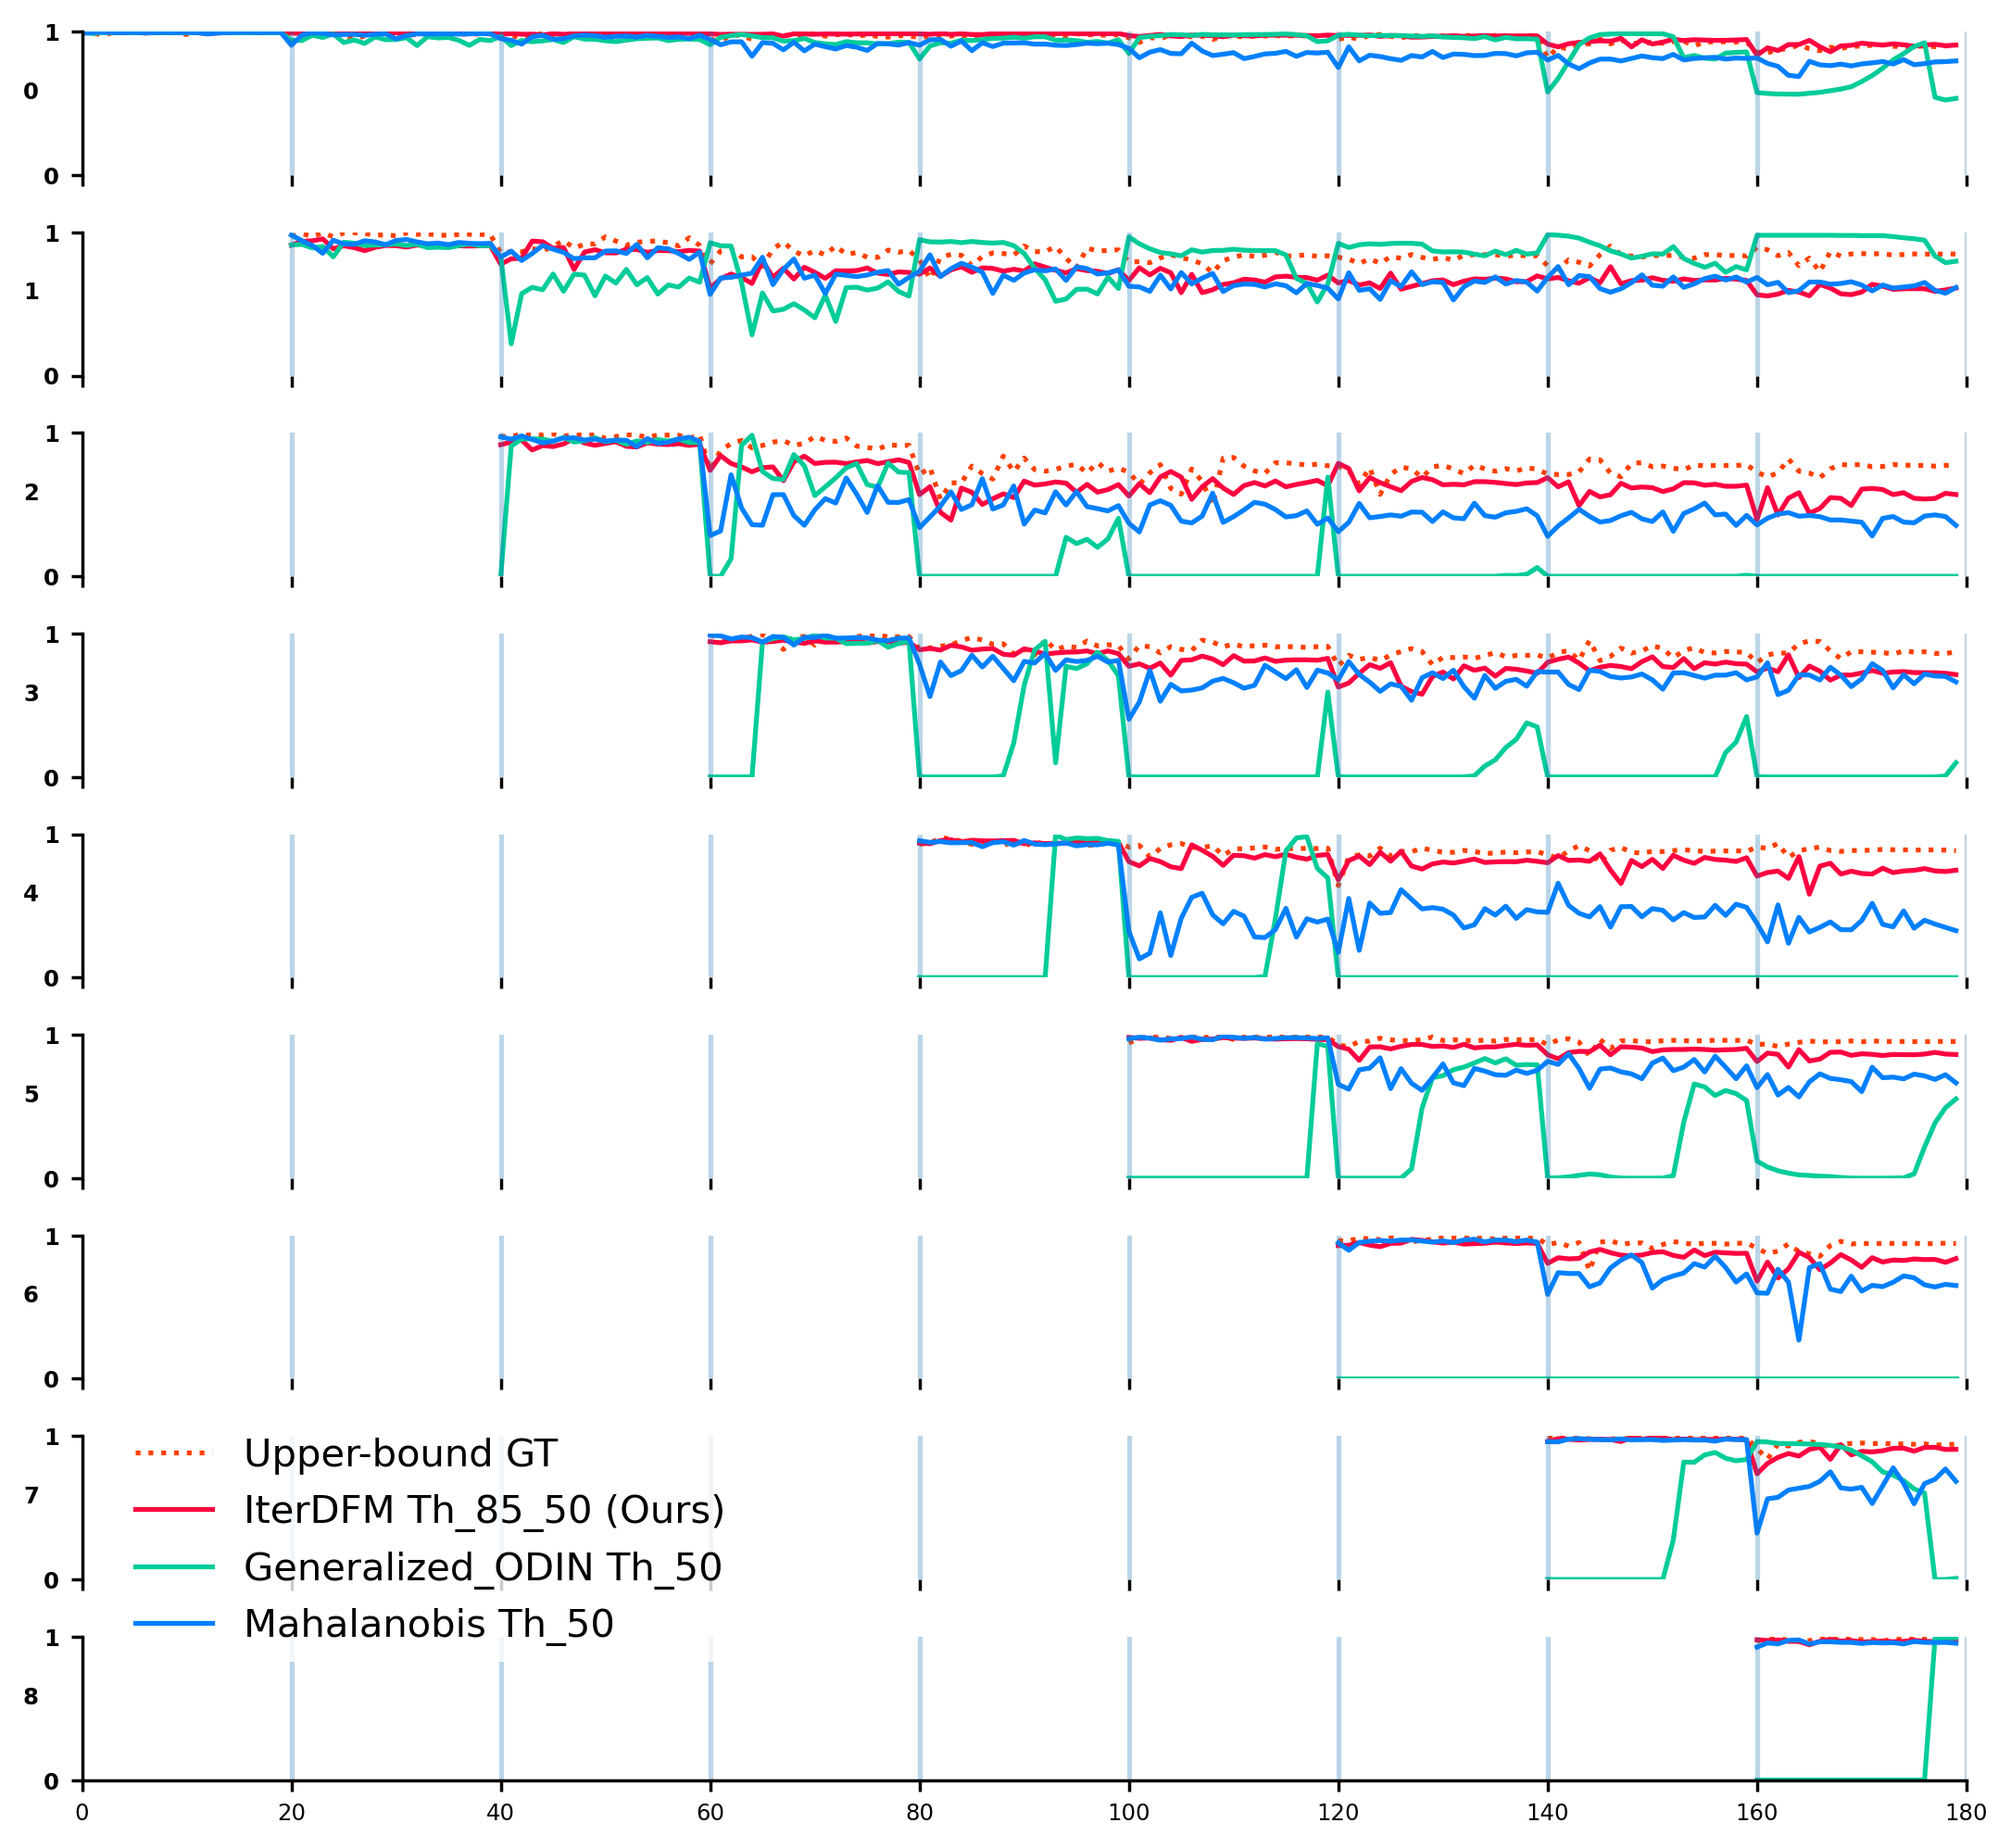

In [65]:
task_delim = epoch_max
fig_size_ = (10.5,10)

tasks_plot = np.arange(0,tasks_max,stepsize)

f, axarr = plt.subplots(tasks_plot.shape[0], sharex=True, figsize=fig_size_)

f.subplots_adjust(hspace=0.4)
# f.suptitle('ACGAN Classifier Accuracies per task \n Dataset %s'%(dataset_name))


axes=np.arange(len(versions))

alpha=0.3
for i,t in enumerate(tasks_plot):

    for k in range(data_mult.shape[0]):
        axarr[i].plot(np.arange(data_mult.shape[1]), data_mult[k,:,t], linestyle=lines[k], color=colors[k], \
            linewidth=1.5, markersize=2, label='%s'% (names[k]))
    
    for b in range(tasks_max):
        axarr[i].axvline(x=task_delim*(b+1), alpha=alpha)
        
    axarr[i].set_ylabel('%d'%((t)), rotation=0, fontsize=7, fontweight='semibold')

    axarr[i].set_yticks(np.arange(0.0,1.05,1.0))
    axarr[i].set_ylim([0, 1.0])
    axarr[i].set_yticklabels(['0','1'], fontsize=3, fontweight='semibold')
    
    axarr[i].tick_params(axis = 'both', which = 'major', labelsize = 7, width=1)

    for axis in ['bottom','left']:
        axarr[i].spines[axis].set_linewidth(1.0)

    
    # # Hide the right and top spines
    axarr[i].spines['right'].set_visible(False)
    axarr[i].spines['top'].set_visible(False)
    if i<tasks_max-1:
        axarr[i].spines['bottom'].set_visible(False)
        axarr[i].set_xticks([])
        axarr[i].tick_params(bottom="off")


    # # # Only show ticks on the left and bottom spines
    axarr[i].yaxis.set_ticks_position('left')

    
# if dataset_name=='mnist' or dataset_name=='permuted':
axarr[-1].set_xticks(np.arange(0,data_mult.shape[1]+epoch_max,epoch_max))
    # axarr[-1].set_xticklabels(['0', '5', '10', '15', '20', '25'],fontweight='semibold')
    ## axarr[-1].set_xticklabels(np.arange(0,data_mult.shape[1]+epoch_max,50), fontsize=7, fontweight='semibold')
    ## axarr[-1].set_xlabel('Iterations',  fontsize='small', fontweight='semibold') 
box = (0.02, 2.5)


axarr[-1].axis([0, np.arange(data_mult.shape[1]).shape[0], 0.0, 1.0])

lgd = axarr[-1].legend(bbox_to_anchor=box, loc=2, borderaxespad=0., fontsize='large')
lgd.get_frame().set_linewidth(0.0)

In [40]:
[0, np.arange(data_mult.shape[1]).shape[0], 0.0, 1.0]

[0, 205, 0.0, 1.0]